In [2]:
#import libraries
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
#loading data
df = pd.read_csv("monthly_milk.csv")
df.head(5)

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15


In [4]:
df.month = pd.to_datetime(df.month)

In [5]:
total_size = len(df)
train_size = math.floor(0.8*total_size)
train = df.head(train_size)
test = df.tail(len(df)-train_size)

In [6]:
y_hat = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['milk_prod_per_cow_kg'])).fit(smoothing_level=0.6, optimized='False')
y_hat['SES'] = fit2.forecast(len(test))

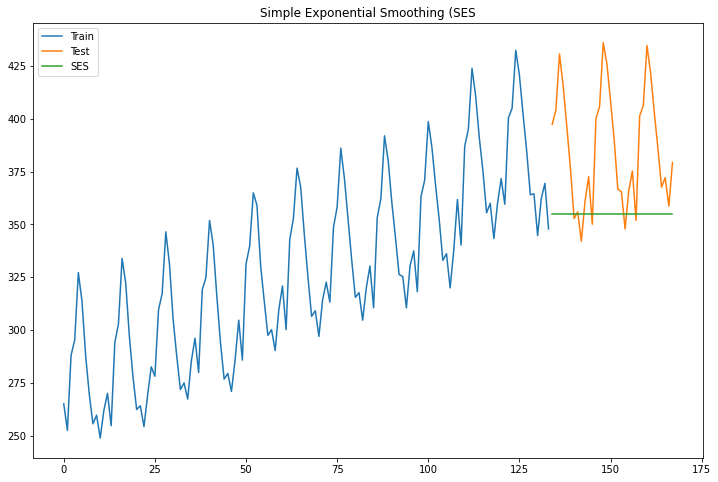

In [8]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['milk_prod_per_cow_kg'], label='Train')
plt.plot(test.index, test['milk_prod_per_cow_kg'], label='Test')
plt.plot(y_hat.index, y_hat['SES'], label = 'SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES")
plt.show()

In [9]:
rms = sqrt(mean_squared_error(test.milk_prod_per_cow_kg, y_hat.SES))
print("RMSE= " +str(rms))

RMSE= 41.23838316027316
